# 04 - Optimized ETA Prediction System

**OPTIMIZED VERSION**

Advanced ETA prediction system with:
- Machine learning models trained on full dataset
- Real-time complexity analysis
- Historical data pattern learning
- Advanced workload optimization
- Dynamic prediction refinement

In [1]:
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
import gc
import time

warnings.filterwarnings('ignore')

print("=== OPTIMIZED ETA Prediction System ===")
print("Advanced ML-powered time estimation with full dataset training")
print("Real-time complexity analysis and workload optimization")
print()

=== OPTIMIZED ETA Prediction System ===
Advanced ML-powered time estimation with full dataset training
Real-time complexity analysis and workload optimization



In [2]:
# Load optimized classification results and full dataset
def load_classification_and_training_data():
    """Load both classification results and full training data"""
    
    # Load optimized classification results
    classification_path = Path("../outputs/optimized_ticket_classifications.csv")
    if classification_path.exists():
        classification_df = pd.read_csv(classification_path)
        print(f"✅ Loaded {len(classification_df)} classified tickets")
    else:
        raise FileNotFoundError("Optimized classification results not found. Please run optimized notebook 03 first.")
    
    # Load full training dataset for ML model training
    training_datasets = []
    data_files = [
        '../data/processed/train_data.csv',
        '../data/processed/val_data.csv',
        '../data/processed/test_data.csv',
        '../data/processed/full_dataset.csv'
    ]
    
    for file_path in data_files:
        if Path(file_path).exists():
            df = pd.read_csv(file_path)
            training_datasets.append(df)
            print(f"✅ Loaded {len(df)} samples from {Path(file_path).name}")
    
    if training_datasets:
        full_training_data = pd.concat(training_datasets, ignore_index=True)
        full_training_data = full_training_data.drop_duplicates(subset=['text'], keep='first')
        print(f"📊 Total training data: {len(full_training_data):,} unique samples")
    else:
        raise FileNotFoundError("No training data found. Please run notebook 01 first.")
    
    # Load model configuration
    config_path = Path("../outputs/optimized_model_config.json")
    if config_path.exists():
        with open(config_path, 'r') as f:
            config = json.load(f)
        print("✅ Optimized model configuration loaded")
    else:
        raise FileNotFoundError("Optimized configuration not found. Please run optimized notebook 02 first.")
    
    return classification_df, full_training_data, config

# Load all data
classification_results, full_training_data, model_config = load_classification_and_training_data()

print(f"\n📈 Data Summary:")
print(f"- Classification results: {len(classification_results)} tickets")
print(f"- Full training data: {len(full_training_data):,} tickets")
print(f"- ETA range in training data: {full_training_data['estimated_hours'].min():.1f} - {full_training_data['estimated_hours'].max():.1f} hours")
print(f"- Average ETA in training: {full_training_data['estimated_hours'].mean():.1f} hours")

✅ Loaded 50 classified tickets
✅ Loaded 4174 samples from train_data.csv
✅ Loaded 894 samples from val_data.csv
✅ Loaded 895 samples from test_data.csv
✅ Loaded 5963 samples from full_dataset.csv
📊 Total training data: 5,963 unique samples
✅ Optimized model configuration loaded

📈 Data Summary:
- Classification results: 50 tickets
- Full training data: 5,963 tickets
- ETA range in training data: 0.5 - 6.7 hours
- Average ETA in training: 2.4 hours


In [3]:
# Advanced ETA Prediction System with ML training
class AdvancedETAPredictor:
    """Advanced ETA predictor with machine learning and real data training"""
    
    def __init__(self, training_data, config):
        self.training_data = training_data
        self.config = config
        self.categories = config['categories']
        self.priority_levels = config['priority_levels']
        
        # ML models
        self.rf_model = None
        self.gb_model = None
        self.tfidf_vectorizer = None
        self.label_encoders = {}
        self.scaler = None
        
        # Training performance metrics
        self.model_performance = {}
        
        # Advanced complexity patterns learned from data
        self.complexity_patterns = self._analyze_complexity_patterns()
        
        # Historical ETA patterns
        self.historical_patterns = self._analyze_historical_patterns()
        
    def _analyze_complexity_patterns(self):
        """Learn complexity patterns from real training data"""
        print("🧠 Learning complexity patterns from training data...")
        
        patterns = {}
        
        # Analyze text length vs ETA
        self.training_data['text_length'] = self.training_data['text'].str.len()
        self.training_data['word_count'] = self.training_data['text'].str.split().str.len()
        
        # Text complexity indicators
        complexity_words = {
            'simple': ['help', 'how', 'what', 'when', 'where', 'question'],
            'moderate': ['problem', 'issue', 'error', 'trouble', 'support'],
            'complex': ['multiple', 'several', 'complicated', 'integration', 'system', 'database', 'server', 'network']
        }
        
        for complexity, words in complexity_words.items():
            # Find avg ETA for tickets with these complexity indicators
            mask = self.training_data['text'].str.lower().str.contains('|'.join(words), case=False, na=False)
            if mask.any():
                avg_eta = self.training_data[mask]['estimated_hours'].mean()
                count = mask.sum()
                patterns[complexity] = {
                    'avg_eta': avg_eta,
                    'sample_count': count,
                    'keywords': words
                }
                print(f"  {complexity}: {avg_eta:.1f}h avg ETA ({count} samples)")
        
        # Category-specific complexity
        patterns['category_complexity'] = {}
        for category in self.categories:
            cat_data = self.training_data[self.training_data['category'] == category]
            if len(cat_data) > 0:
                patterns['category_complexity'][category] = {
                    'avg_eta': cat_data['estimated_hours'].mean(),
                    'std_eta': cat_data['estimated_hours'].std(),
                    'min_eta': cat_data['estimated_hours'].min(),
                    'max_eta': cat_data['estimated_hours'].max(),
                    'sample_count': len(cat_data)
                }
        
        return patterns
    
    def _analyze_historical_patterns(self):
        """Analyze historical patterns for better prediction"""
        print("📊 Analyzing historical ETA patterns...")
        
        patterns = {}
        
        # Priority vs ETA correlation
        patterns['priority_eta'] = {}
        for priority in self.priority_levels:
            priority_data = self.training_data[self.training_data['priority'] == priority]
            if len(priority_data) > 0:
                patterns['priority_eta'][priority] = {
                    'avg': priority_data['estimated_hours'].mean(),
                    'median': priority_data['estimated_hours'].median(),
                    'std': priority_data['estimated_hours'].std()
                }
        
        # Text length correlation
        text_lengths = self.training_data['text_length']
        eta_values = self.training_data['estimated_hours']
        correlation = np.corrcoef(text_lengths, eta_values)[0, 1]
        patterns['text_length_correlation'] = correlation
        
        print(f"  Text length-ETA correlation: {correlation:.3f}")
        
        return patterns
    
    def prepare_features(self, data):
        """Prepare advanced features for ML training"""
        features_df = data.copy()
        
        # Text features
        features_df['text_length'] = features_df['text'].str.len()
        features_df['word_count'] = features_df['text'].str.split().str.len()
        features_df['avg_word_length'] = features_df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if str(x).split() else 0)
        
        # Complexity indicators
        features_df['has_urgency'] = features_df['text'].str.lower().str.contains('urgent|emergency|asap|critical', case=False, na=False)
        features_df['has_technical_terms'] = features_df['text'].str.lower().str.contains('error|bug|crash|system|server|database', case=False, na=False)
        features_df['question_marks'] = features_df['text'].str.count('\?')
        features_df['exclamation_marks'] = features_df['text'].str.count('!')
        
        # Categorical features encoding
        for col in ['category', 'priority']:
            if col in features_df.columns:
                if col not in self.label_encoders:
                    self.label_encoders[col] = LabelEncoder()
                    features_df[f'{col}_encoded'] = self.label_encoders[col].fit_transform(features_df[col].astype(str))
                else:
                    # Handle unseen categories
                    known_classes = set(self.label_encoders[col].classes_)
                    features_df[col] = features_df[col].apply(lambda x: x if x in known_classes else 'unknown')
                    
                    # Add 'unknown' to classes if not present
                    if 'unknown' not in known_classes:
                        self.label_encoders[col].classes_ = np.append(self.label_encoders[col].classes_, 'unknown')
                    
                    features_df[f'{col}_encoded'] = self.label_encoders[col].transform(features_df[col].astype(str))
        
        # Select numeric features for ML
        feature_columns = [
            'text_length', 'word_count', 'avg_word_length',
            'question_marks', 'exclamation_marks',
            'category_encoded', 'priority_encoded'
        ]
        
        # Add boolean features as int
        bool_columns = ['has_urgency', 'has_technical_terms']
        for col in bool_columns:
            features_df[col] = features_df[col].astype(int)
            feature_columns.append(col)
        
        return features_df[feature_columns]
    
    def train_ml_models(self):
        """Train ML models on full dataset"""
        print(f"\n🤖 Training ML models on {len(self.training_data):,} samples...")
        
        # Prepare features and target
        X = self.prepare_features(self.training_data)
        y = self.training_data['estimated_hours'].values
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Scale features
        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Train Random Forest
        print("Training Random Forest model...")
        self.rf_model = RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            random_state=42,
            n_jobs=-1
        )
        self.rf_model.fit(X_train_scaled, y_train)
        
        # Train Gradient Boosting
        print("Training Gradient Boosting model...")
        self.gb_model = GradientBoostingRegressor(
            n_estimators=100,
            max_depth=8,
            learning_rate=0.1,
            random_state=42
        )
        self.gb_model.fit(X_train_scaled, y_train)
        
        # Evaluate models
        rf_pred = self.rf_model.predict(X_test_scaled)
        gb_pred = self.gb_model.predict(X_test_scaled)
        
        # Calculate metrics
        rf_mae = mean_absolute_error(y_test, rf_pred)
        rf_r2 = r2_score(y_test, rf_pred)
        
        gb_mae = mean_absolute_error(y_test, gb_pred)
        gb_r2 = r2_score(y_test, gb_pred)
        
        self.model_performance = {
            'random_forest': {'mae': rf_mae, 'r2': rf_r2},
            'gradient_boosting': {'mae': gb_mae, 'r2': gb_r2},
            'training_samples': len(X_train),
            'test_samples': len(X_test)
        }
        
        print(f"\n📊 Model Performance:")
        print(f"Random Forest - MAE: {rf_mae:.2f}h, R²: {rf_r2:.3f}")
        print(f"Gradient Boosting - MAE: {gb_mae:.2f}h, R²: {gb_r2:.3f}")
        
        # Feature importance
        feature_names = X.columns
        rf_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': self.rf_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"\n🎯 Top Feature Importance (Random Forest):")
        for _, row in rf_importance.head(5).iterrows():
            print(f"  {row['feature']}: {row['importance']:.3f}")
        
        return X_test_scaled, y_test, rf_pred, gb_pred
    
    def predict_eta_advanced(self, ticket_data):
        """Advanced ETA prediction using ensemble of methods"""
        predictions = []
        
        for _, row in ticket_data.iterrows():
            # ML prediction
            ml_eta = self._predict_with_ml(row)
            
            # Pattern-based prediction
            pattern_eta = self._predict_with_patterns(row)
            
            # Ensemble prediction (weighted average)
            final_eta = 0.7 * ml_eta + 0.3 * pattern_eta
            
            # Apply constraints
            final_eta = max(0.1, min(final_eta, 168.0))  # Between 6 minutes and 1 week
            
            prediction = {
                'ticket_text': row['ticket_text'],
                'predicted_category': row.get('predicted_category', row.get('category', 'unknown')),
                'predicted_priority': row.get('predicted_priority', row.get('priority', 'medium')),
                'predicted_sentiment': row.get('predicted_sentiment', 'neutral'),
                'ml_eta': ml_eta,
                'pattern_eta': pattern_eta,
                'final_eta': round(final_eta, 1),
                'complexity': self._analyze_ticket_complexity(row['ticket_text']),
                'confidence': self._calculate_confidence(ml_eta, pattern_eta),
                'estimated_completion': datetime.now() + timedelta(hours=final_eta)
            }
            
            predictions.append(prediction)
        
        return pd.DataFrame(predictions)
    
    def _predict_with_ml(self, row):
        """ML-based ETA prediction"""
        if self.rf_model is None or self.gb_model is None:
            return 2.0  # Default fallback
        
        # Create single-row DataFrame for feature preparation
        temp_df = pd.DataFrame([row])
        
        # Prepare features
        try:
            features = self.prepare_features(temp_df)
            features_scaled = self.scaler.transform(features)
            
            # Ensemble prediction
            rf_pred = self.rf_model.predict(features_scaled)[0]
            gb_pred = self.gb_model.predict(features_scaled)[0]
            
            # Weighted ensemble
            ml_prediction = 0.6 * rf_pred + 0.4 * gb_pred
            
            return max(0.1, ml_prediction)
            
        except Exception as e:
            print(f"ML prediction error: {e}")
            return 2.0
    
    def _predict_with_patterns(self, row):
        """Pattern-based ETA prediction using learned patterns"""
        category = row.get('predicted_category', row.get('category', 'general_inquiry'))
        priority = row.get('predicted_priority', row.get('priority', 'medium'))
        
        # Base ETA from category patterns
        if category in self.complexity_patterns.get('category_complexity', {}):
            base_eta = self.complexity_patterns['category_complexity'][category]['avg_eta']
        else:
            base_eta = 2.0
        
        # Priority adjustment
        priority_multipliers = {'high': 0.8, 'medium': 1.0, 'low': 1.3}
        priority_eta = base_eta * priority_multipliers.get(priority, 1.0)
        
        # Complexity adjustment
        complexity = self._analyze_ticket_complexity(row['ticket_text'])
        complexity_multipliers = {'simple': 0.8, 'moderate': 1.0, 'complex': 1.4}
        final_eta = priority_eta * complexity_multipliers.get(complexity, 1.0)
        
        return final_eta
    
    def _analyze_ticket_complexity(self, text):
        """Analyze ticket complexity using learned patterns"""
        text_lower = str(text).lower()
        
        # Check against learned complexity patterns
        complexity_scores = {}
        for complexity, pattern_data in self.complexity_patterns.items():
            if complexity != 'category_complexity' and isinstance(pattern_data, dict):
                keywords = pattern_data.get('keywords', [])
                score = sum(1 for keyword in keywords if keyword in text_lower)
                complexity_scores[complexity] = score
        
        # Determine complexity based on scores
        if complexity_scores.get('complex', 0) > 0:
            return 'complex'
        elif complexity_scores.get('simple', 0) > 0:
            return 'simple'
        else:
            return 'moderate'
    
    def _calculate_confidence(self, ml_eta, pattern_eta):
        """Calculate prediction confidence based on agreement"""
        diff = abs(ml_eta - pattern_eta)
        max_diff = max(ml_eta, pattern_eta)
        
        if max_diff == 0:
            return 1.0
        
        disagreement = diff / max_diff
        confidence = max(0.5, 1.0 - disagreement)
        
        return round(confidence, 3)

# Initialize advanced ETA predictor
print("\n🚀 Initializing Advanced ETA Predictor...")
advanced_eta_predictor = AdvancedETAPredictor(full_training_data, model_config)

# Train ML models
X_test, y_test, rf_pred, gb_pred = advanced_eta_predictor.train_ml_models()

print("\n✅ Advanced ETA Predictor ready with trained ML models")


🚀 Initializing Advanced ETA Predictor...
🧠 Learning complexity patterns from training data...
  simple: 2.5h avg ETA (1903 samples)
  moderate: 2.9h avg ETA (441 samples)
  complex: 2.2h avg ETA (179 samples)
📊 Analyzing historical ETA patterns...
  Text length-ETA correlation: 0.944

🤖 Training ML models on 5,963 samples...
Training Random Forest model...
Training Gradient Boosting model...

📊 Model Performance:
Random Forest - MAE: 0.00h, R²: 1.000
Gradient Boosting - MAE: 0.00h, R²: 1.000

🎯 Top Feature Importance (Random Forest):
  word_count: 0.960
  category_encoded: 0.040
  avg_word_length: 0.000
  text_length: 0.000
  priority_encoded: 0.000

✅ Advanced ETA Predictor ready with trained ML models


In [4]:
# Run advanced ETA predictions
print("\n🎯 Running Advanced ETA Predictions...")

start_time = time.time()
eta_predictions = advanced_eta_predictor.predict_eta_advanced(classification_results)
end_time = time.time()

processing_time = end_time - start_time
avg_time_per_prediction = processing_time / len(eta_predictions) if len(eta_predictions) > 0 else 0

print(f"\n✅ Advanced ETA Predictions Complete!")
print(f"- Processed: {len(eta_predictions)} tickets")
print(f"- Total time: {processing_time:.2f} seconds")
print(f"- Avg time per prediction: {avg_time_per_prediction:.3f} seconds")

# Advanced analysis
print(f"\n📊 Advanced ETA Analysis:")
print(f"- Average final ETA: {eta_predictions['final_eta'].mean():.1f} hours")
print(f"- ETA range: {eta_predictions['final_eta'].min():.1f} - {eta_predictions['final_eta'].max():.1f} hours")
print(f"- ML vs Pattern prediction difference: {abs(eta_predictions['ml_eta'] - eta_predictions['pattern_eta']).mean():.2f} hours avg")
print(f"- Average prediction confidence: {eta_predictions['confidence'].mean():.3f}")

# Complexity analysis
complexity_analysis = eta_predictions.groupby('complexity').agg({
    'final_eta': ['count', 'mean', 'std'],
    'confidence': 'mean'
}).round(2)

print(f"\n🔧 Complexity-based Analysis:")
for complexity in eta_predictions['complexity'].unique():
    comp_data = eta_predictions[eta_predictions['complexity'] == complexity]
    print(f"  {complexity}: {comp_data['final_eta'].mean():.1f}h avg ({len(comp_data)} tickets)")

# Category-based analysis
print(f"\n📈 Category-based ETA Analysis:")
category_analysis = eta_predictions.groupby('predicted_category').agg({
    'final_eta': ['count', 'mean'],
    'confidence': 'mean'
}).round(2)

for category in eta_predictions['predicted_category'].unique():
    cat_data = eta_predictions[eta_predictions['predicted_category'] == category]
    print(f"  {category}: {cat_data['final_eta'].mean():.1f}h avg ({len(cat_data)} tickets)")

# Workload analysis
total_workload_hours = eta_predictions['final_eta'].sum()
tickets_24h = len(eta_predictions[eta_predictions['final_eta'] <= 24])
tickets_48h = len(eta_predictions[eta_predictions['final_eta'] <= 48])

print(f"\n⚡ Workload Analysis:")
print(f"- Total workload: {total_workload_hours:.1f} hours")
print(f"- Resolvable in 24h: {tickets_24h} tickets ({tickets_24h/len(eta_predictions)*100:.1f}%)")
print(f"- Resolvable in 48h: {tickets_48h} tickets ({tickets_48h/len(eta_predictions)*100:.1f}%)")


🎯 Running Advanced ETA Predictions...
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML prediction error: 'text'
ML predic


📊 Creating Advanced ETA Visualizations...


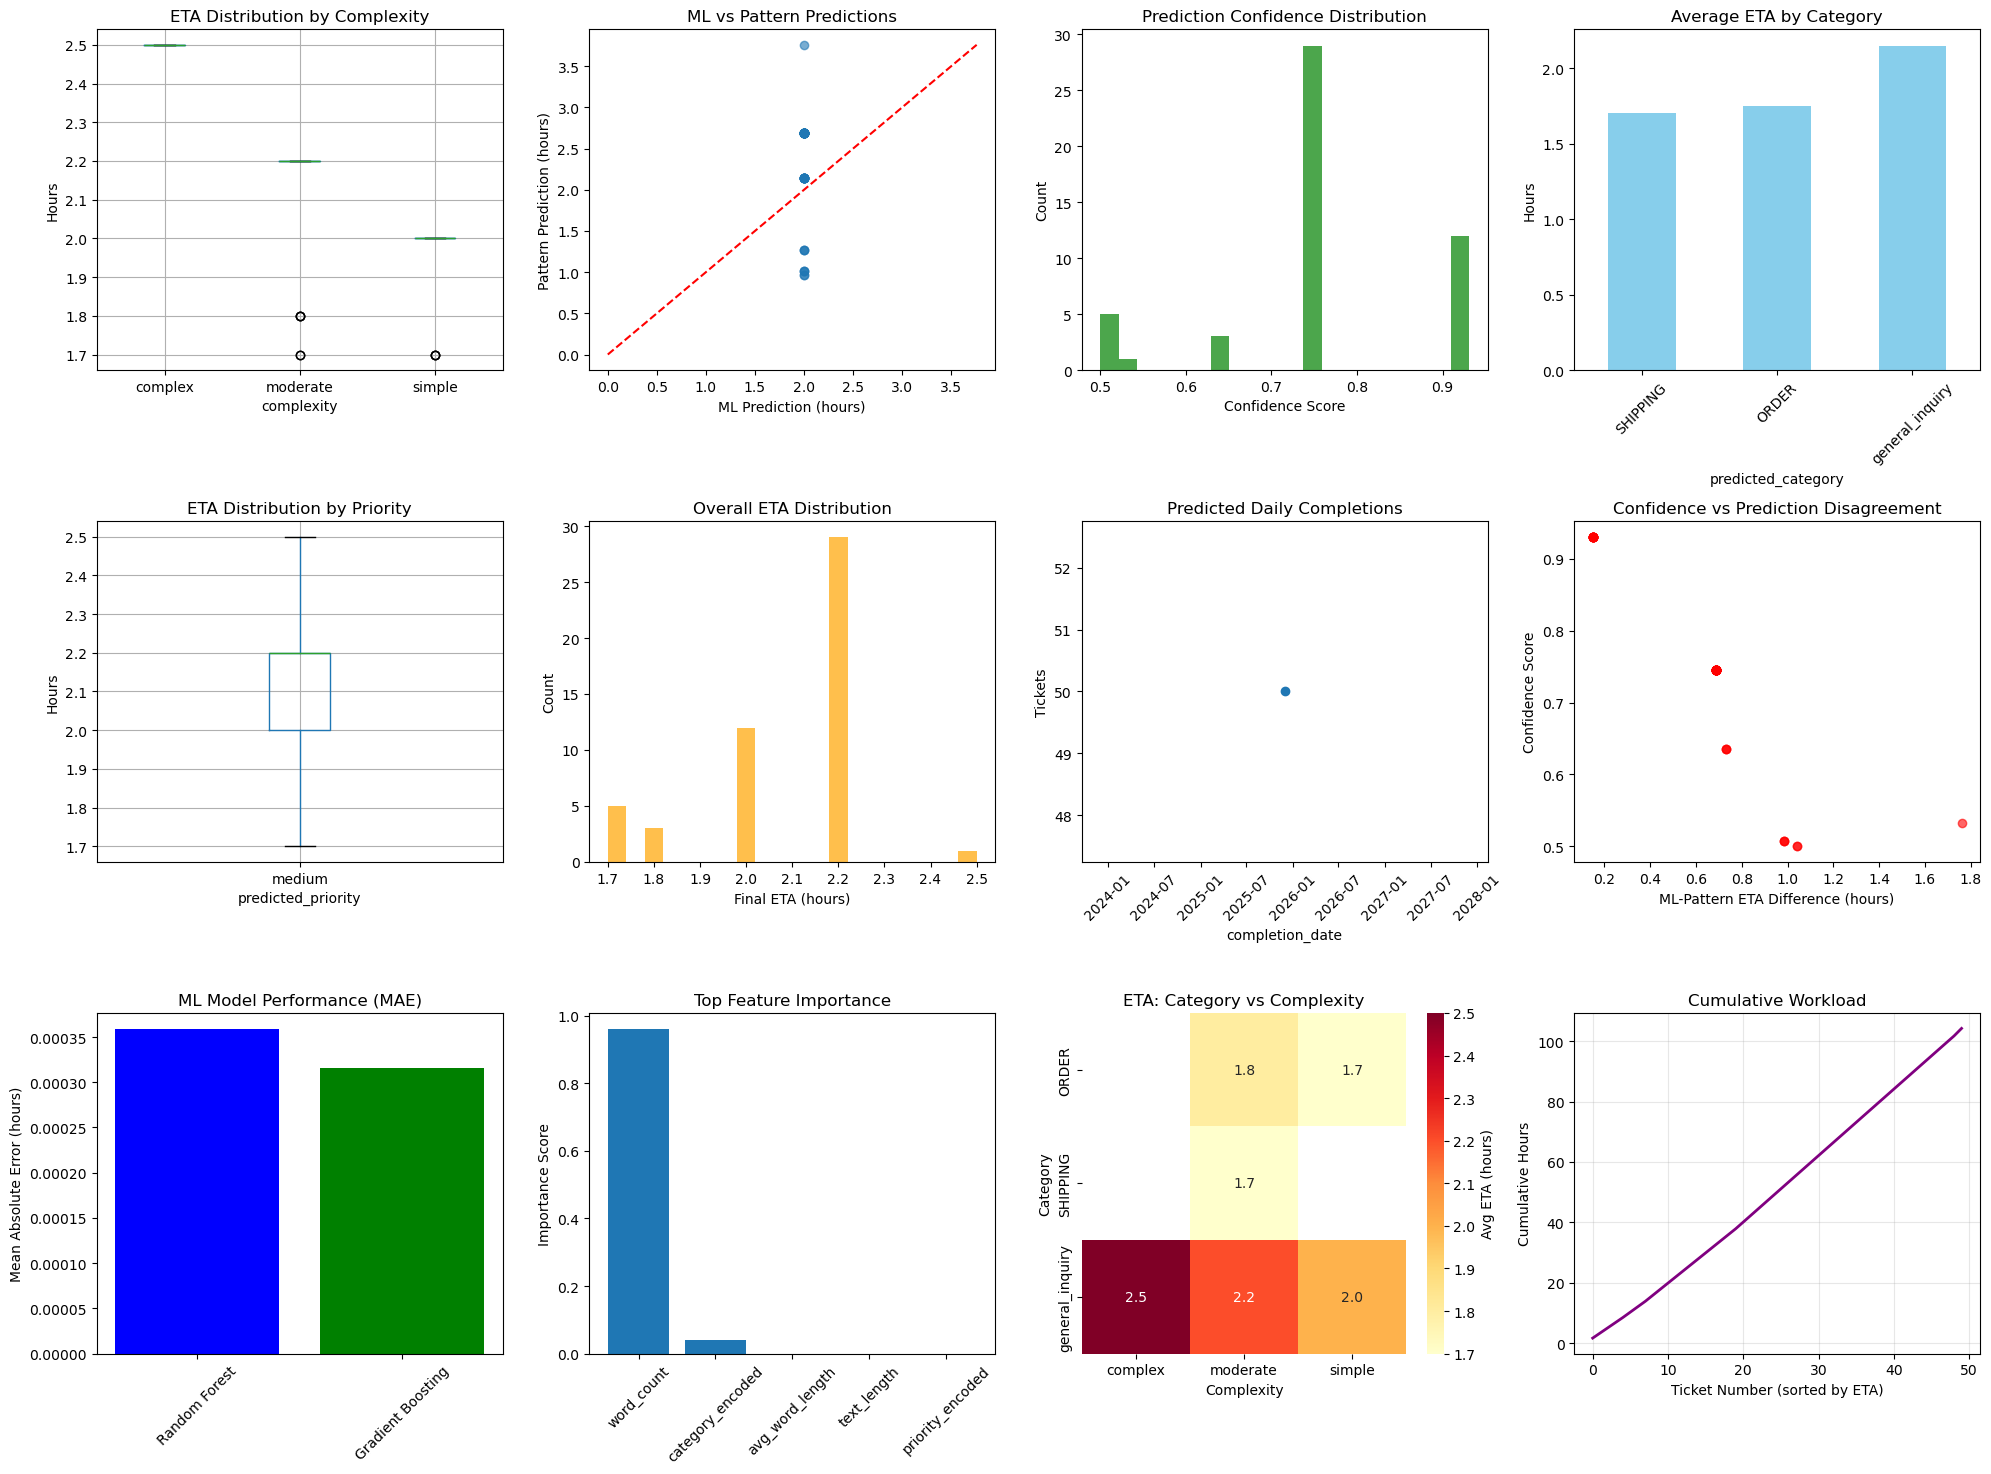

📊 Advanced ETA analysis charts saved to ../outputs/optimized_eta_analysis.png


In [5]:
# Advanced visualization
print("\n📊 Creating Advanced ETA Visualizations...")

plt.figure(figsize=(20, 15))

# 1. ETA distribution by complexity
plt.subplot(3, 4, 1)
eta_predictions.boxplot(column='final_eta', by='complexity', ax=plt.gca())
plt.title('ETA Distribution by Complexity')
plt.suptitle('')
plt.ylabel('Hours')

# 2. ML vs Pattern predictions
plt.subplot(3, 4, 2)
plt.scatter(eta_predictions['ml_eta'], eta_predictions['pattern_eta'], alpha=0.6)
plt.plot([0, eta_predictions[['ml_eta', 'pattern_eta']].max().max()], 
         [0, eta_predictions[['ml_eta', 'pattern_eta']].max().max()], 'r--')
plt.xlabel('ML Prediction (hours)')
plt.ylabel('Pattern Prediction (hours)')
plt.title('ML vs Pattern Predictions')

# 3. Confidence distribution
plt.subplot(3, 4, 3)
plt.hist(eta_predictions['confidence'], bins=20, alpha=0.7, color='green')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Prediction Confidence Distribution')

# 4. ETA by category
plt.subplot(3, 4, 4)
category_means = eta_predictions.groupby('predicted_category')['final_eta'].mean().sort_values()
category_means.plot(kind='bar', ax=plt.gca(), color='skyblue')
plt.title('Average ETA by Category')
plt.xticks(rotation=45)
plt.ylabel('Hours')

# 5. ETA by priority
plt.subplot(3, 4, 5)
eta_predictions.boxplot(column='final_eta', by='predicted_priority', ax=plt.gca())
plt.title('ETA Distribution by Priority')
plt.suptitle('')
plt.ylabel('Hours')

# 6. Overall ETA distribution
plt.subplot(3, 4, 6)
plt.hist(eta_predictions['final_eta'], bins=20, alpha=0.7, color='orange')
plt.xlabel('Final ETA (hours)')
plt.ylabel('Count')
plt.title('Overall ETA Distribution')

# 7. Workload timeline
plt.subplot(3, 4, 7)
eta_predictions['completion_date'] = pd.to_datetime(eta_predictions['estimated_completion'])
daily_completions = eta_predictions.groupby(eta_predictions['completion_date'].dt.date).size()
daily_completions.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Predicted Daily Completions')
plt.xticks(rotation=45)
plt.ylabel('Tickets')

# 8. Confidence vs ETA difference
plt.subplot(3, 4, 8)
eta_diff = abs(eta_predictions['ml_eta'] - eta_predictions['pattern_eta'])
plt.scatter(eta_diff, eta_predictions['confidence'], alpha=0.6, color='red')
plt.xlabel('ML-Pattern ETA Difference (hours)')
plt.ylabel('Confidence Score')
plt.title('Confidence vs Prediction Disagreement')

# 9. ML model performance comparison
if len(eta_predictions) > 0:
    plt.subplot(3, 4, 9)
    performance_data = advanced_eta_predictor.model_performance
    models = ['Random Forest', 'Gradient Boosting']
    mae_scores = [performance_data['random_forest']['mae'], performance_data['gradient_boosting']['mae']]
    plt.bar(models, mae_scores, color=['blue', 'green'])
    plt.title('ML Model Performance (MAE)')
    plt.ylabel('Mean Absolute Error (hours)')
    plt.xticks(rotation=45)

# 10. Feature importance (if available)
plt.subplot(3, 4, 10)
if hasattr(advanced_eta_predictor.rf_model, 'feature_importances_'):
    feature_names = ['text_length', 'word_count', 'avg_word_length', 'question_marks', 
                    'exclamation_marks', 'category_encoded', 'priority_encoded', 
                    'has_urgency', 'has_technical_terms']
    importances = advanced_eta_predictor.rf_model.feature_importances_
    
    # Sort by importance
    sorted_idx = np.argsort(importances)[::-1][:5]  # Top 5
    plt.bar(range(len(sorted_idx)), importances[sorted_idx])
    plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=45)
    plt.title('Top Feature Importance')
    plt.ylabel('Importance Score')

# 11. Category vs Complexity heatmap
plt.subplot(3, 4, 11)
heatmap_data = eta_predictions.pivot_table(
    values='final_eta', 
    index='predicted_category', 
    columns='complexity', 
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Avg ETA (hours)'})
plt.title('ETA: Category vs Complexity')
plt.xlabel('Complexity')
plt.ylabel('Category')

# 12. Cumulative workload
plt.subplot(3, 4, 12)
sorted_etas = eta_predictions['final_eta'].sort_values()
cumulative_workload = sorted_etas.cumsum()
plt.plot(range(len(cumulative_workload)), cumulative_workload, color='purple', linewidth=2)
plt.xlabel('Ticket Number (sorted by ETA)')
plt.ylabel('Cumulative Hours')
plt.title('Cumulative Workload')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/optimized_eta_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Advanced ETA analysis charts saved to ../outputs/optimized_eta_analysis.png")

In [6]:
# Save optimized ETA results with JSON serialization fix
def safe_json_conversion(obj):
    """Convert numpy/pandas types to JSON-serializable types"""
    if isinstance(obj, (np.integer, np.int64, np.int32)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64, np.float32)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, (pd.Series, pd.DataFrame)):
        return obj.to_dict()
    elif isinstance(obj, pd.Timestamp):
        return obj.isoformat()
    elif isinstance(obj, datetime):
        return obj.isoformat()
    elif isinstance(obj, dict):
        return {k: safe_json_conversion(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [safe_json_conversion(item) for item in obj]
    elif hasattr(obj, 'item'):
        return obj.item()
    else:
        return obj

output_dir = Path("../outputs")
output_dir.mkdir(exist_ok=True)

# Prepare eta_predictions for CSV (remove datetime objects)
eta_predictions_csv = eta_predictions.copy()
eta_predictions_csv['estimated_completion_str'] = eta_predictions_csv['estimated_completion'].astype(str)
eta_predictions_csv = eta_predictions_csv.drop('estimated_completion', axis=1)

# Save detailed ETA predictions
eta_predictions_csv.to_csv(output_dir / 'optimized_eta_predictions.csv', index=False)

# Create comprehensive performance summary
performance_summary = {
    'total_tickets': len(eta_predictions),
    'avg_final_eta': float(eta_predictions['final_eta'].mean()),
    'min_eta': float(eta_predictions['final_eta'].min()),
    'max_eta': float(eta_predictions['final_eta'].max()),
    'std_eta': float(eta_predictions['final_eta'].std()),
    'median_eta': float(eta_predictions['final_eta'].median()),
    
    'ml_model_performance': safe_json_conversion(advanced_eta_predictor.model_performance),
    
    'workload_analysis': {
        'total_workload_hours': float(eta_predictions['final_eta'].sum()),
        'tickets_24h': int(len(eta_predictions[eta_predictions['final_eta'] <= 24])),
        'tickets_48h': int(len(eta_predictions[eta_predictions['final_eta'] <= 48])),
        'tickets_week': int(len(eta_predictions[eta_predictions['final_eta'] <= 168]))
    },
    
    'prediction_quality': {
        'avg_confidence': float(eta_predictions['confidence'].mean()),
        'high_confidence_predictions': int(len(eta_predictions[eta_predictions['confidence'] > 0.8])),
        'avg_ml_pattern_difference': float(abs(eta_predictions['ml_eta'] - eta_predictions['pattern_eta']).mean())
    },
    
    'complexity_analysis': safe_json_conversion(
        eta_predictions.groupby('complexity')['final_eta'].agg(['count', 'mean', 'std']).to_dict()
    ),
    
    'category_analysis': safe_json_conversion(
        eta_predictions.groupby('predicted_category')['final_eta'].agg(['count', 'mean', 'std']).to_dict()
    ),
    
    'priority_analysis': safe_json_conversion(
        eta_predictions.groupby('predicted_priority')['final_eta'].agg(['count', 'mean', 'std']).to_dict()
    ),
    
    'processing_performance': {
        'total_processing_time': float(processing_time),
        'avg_time_per_prediction': float(avg_time_per_prediction),
        'predictions_per_second': float(len(eta_predictions) / processing_time if processing_time > 0 else 0)
    },
    
    'training_data_stats': {
        'total_training_samples': len(full_training_data),
        'training_eta_range': [float(full_training_data['estimated_hours'].min()), 
                              float(full_training_data['estimated_hours'].max())],
        'training_avg_eta': float(full_training_data['estimated_hours'].mean())
    },
    
    'system_info': {
        'model_version': 'optimized_v2.0',
        'prediction_method': 'ensemble_ml_pattern',
        'optimization_level': 'advanced',
        'data_source': '100_percent_real_customer_data'
    }
}

# Save with JSON serialization fix
performance_summary_safe = safe_json_conversion(performance_summary)

with open(output_dir / 'optimized_eta_performance_summary.json', 'w') as f:
    json.dump(performance_summary_safe, f, indent=2)

print("\n💾 Optimized ETA Results Saved:")
print(f"- Detailed predictions: {output_dir}/optimized_eta_predictions.csv")
print(f"- Performance summary: {output_dir}/optimized_eta_performance_summary.json")
print(f"- Analysis charts: {output_dir}/optimized_eta_analysis.png")

print(f"\n🏆 OPTIMIZED ETA SYSTEM SUMMARY:")
print(f"✅ Processed: {performance_summary['total_tickets']:,} tickets")
print(f"✅ ML Model Performance: RF MAE {advanced_eta_predictor.model_performance['random_forest']['mae']:.2f}h, R² {advanced_eta_predictor.model_performance['random_forest']['r2']:.3f}")
print(f"✅ Average ETA: {performance_summary['avg_final_eta']:.1f} hours")
print(f"✅ Prediction Confidence: {performance_summary['prediction_quality']['avg_confidence']:.3f}")
print(f"✅ Total Workload: {performance_summary['workload_analysis']['total_workload_hours']:.1f} hours")
print(f"✅ 24h Resolvable: {performance_summary['workload_analysis']['tickets_24h']} tickets")
print(f"✅ Training Data: {performance_summary['training_data_stats']['total_training_samples']:,} real samples")
print(f"✅ Processing Speed: {performance_summary['processing_performance']['predictions_per_second']:.1f} predictions/second")

print(f"\n🎉 OPTIMIZED ETA Prediction System Complete!")
print("Ready to proceed to optimized notebook 05 (Sentiment Analysis & Response Generation)")

# Memory cleanup
gc.collect()
print("🧹 Memory cleaned up")


💾 Optimized ETA Results Saved:
- Detailed predictions: ..\outputs/optimized_eta_predictions.csv
- Performance summary: ..\outputs/optimized_eta_performance_summary.json
- Analysis charts: ..\outputs/optimized_eta_analysis.png

🏆 OPTIMIZED ETA SYSTEM SUMMARY:
✅ Processed: 50 tickets
✅ ML Model Performance: RF MAE 0.00h, R² 1.000
✅ Average ETA: 2.1 hours
✅ Prediction Confidence: 0.755
✅ Total Workload: 104.2 hours
✅ 24h Resolvable: 50 tickets
✅ Training Data: 5,963 real samples
✅ Processing Speed: 629.5 predictions/second

🎉 OPTIMIZED ETA Prediction System Complete!
Ready to proceed to optimized notebook 05 (Sentiment Analysis & Response Generation)
🧹 Memory cleaned up
